<a href="https://colab.research.google.com/github/RaghavendraSreenivasa/kendrick-sentiment-/blob/main/kendrick_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment & Lyrics Analysis of Kendrick Lamar’s songs**

**Goal:**

 Using audio feature analysis and natural language processing (NLP), this study examines the lyrical and sonic environment of Kendrick Lamar's discography.  Finding out how Kendrick's music has changed in tone, mood, and theme over time will be accomplished by examining both the auditory qualities of his songs and the emotional expression of the lyrics.

**Why Kendrick Lamar?**

Kendrick Lamar is renowned for his poetic storytelling, sociopolitical commentary, and artistic versatility. His lyrics span themes such as race, identity, trauma, fame, and personal transformation — making him a prime subject for deep lyrical and emotional analysis.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
df = pd.read_csv("kendrick-new.csv")

In [ ]:
df.head()

In [ ]:
def clean_lyrics(lyrics):
    if pd.isna(lyrics):
        return ""
    lyrics = re.sub(r'\n', ' ', lyrics)
    lyrics = re.sub(r'[^a-zA-Z\s]', '', lyrics)
    return lyrics.lower()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def deep_clean_lyrics(text):
    if pd.isna(text):
        return ""
    text = text.lower().replace('\n', ' ')
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)


In [ ]:
df['deep_clean_lyrics'] = df['lyrics'].apply(deep_clean_lyrics)

In [ ]:
print("🔹 Original:\n", df['lyrics'][0][:300])
print("\n🔹 Cleaned:\n", df['deep_clean_lyrics'][0][:300])

🔹 Original:
 Where are we going? Why are we slowing down?
Where are you going? We should be growing now
Smoke to it nigga, smoke to it nigga, oh
Where are we going? We should be slowing down
Where are you going? We should be growing now
That’s what she said to me, that place I used to call home
Is just a bed to 

🔹 Cleaned:
 going slowing going growing smoke nigga smoke nigga oh going slowing going growing thats said place used call home bed dont even sleep neighbors hear weep meanwhile im streets everybody im trying get know got watch feelings watch staring saddest eyes loneliness look face barely blink tried make righ


In [ ]:
df.head()

,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics,clean_lyrics,vader_compound,vader_pos,vader_neu,vader_neg,deep_clean_lyrics
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...,where are we going why are we slowing down whe...,-0.9884,0.091,0.744,0.165,going slowing going growing smoke nigga smoke ...
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...,lord forgive me kill him where he stand and st...,-0.9974,0.104,0.690,0.206,lord forgive kill stand stand shake hand jump ...
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what...",oh what up ho oh what up i said oh what up ho ...,0.9827,0.180,0.676,0.144,oh ho oh said oh ho oh said oh ho oh well alri...
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal...",she look better than beyonc alicia keys halle ...,-0.9089,0.130,0.708,0.162,look better beyonc alicia keys halle berry mis...
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop...",uh yeah uh yeah uh yeah uh we hurt people that...,0.9716,0.203,0.640,0.157,uh yeah uh yeah uh yeah uh hurt people love us...


In [ ]:
def clean_dedup_lyrics(text):
    if pd.isna(text):
        return ""
    text = text.lower().replace('\n', ' ')
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    seen = set()
    deduped_tokens = []
    for word in tokens:
        if word not in seen:
            seen.add(word)
            deduped_tokens.append(word)
    return ' '.join(deduped_tokens)

In [ ]:
df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)

In [ ]:
df['clean_dedup_lyrics'] = df['lyrics'].apply(clean_dedup_lyrics)
print("🔹 Cleaned with Dedup:\n", df['clean_dedup_lyrics'][0][:300])

In [ ]:
df.head()

# **Graph of word clouds**

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
album_lyrics = df.groupby('album')['clean_dedup_lyrics'].apply(lambda x: ' '.join(x)).to_dict()

In [ ]:
album_word_freqs = {album: Counter(lyrics.split()) for album, lyrics in album_lyrics.items()}

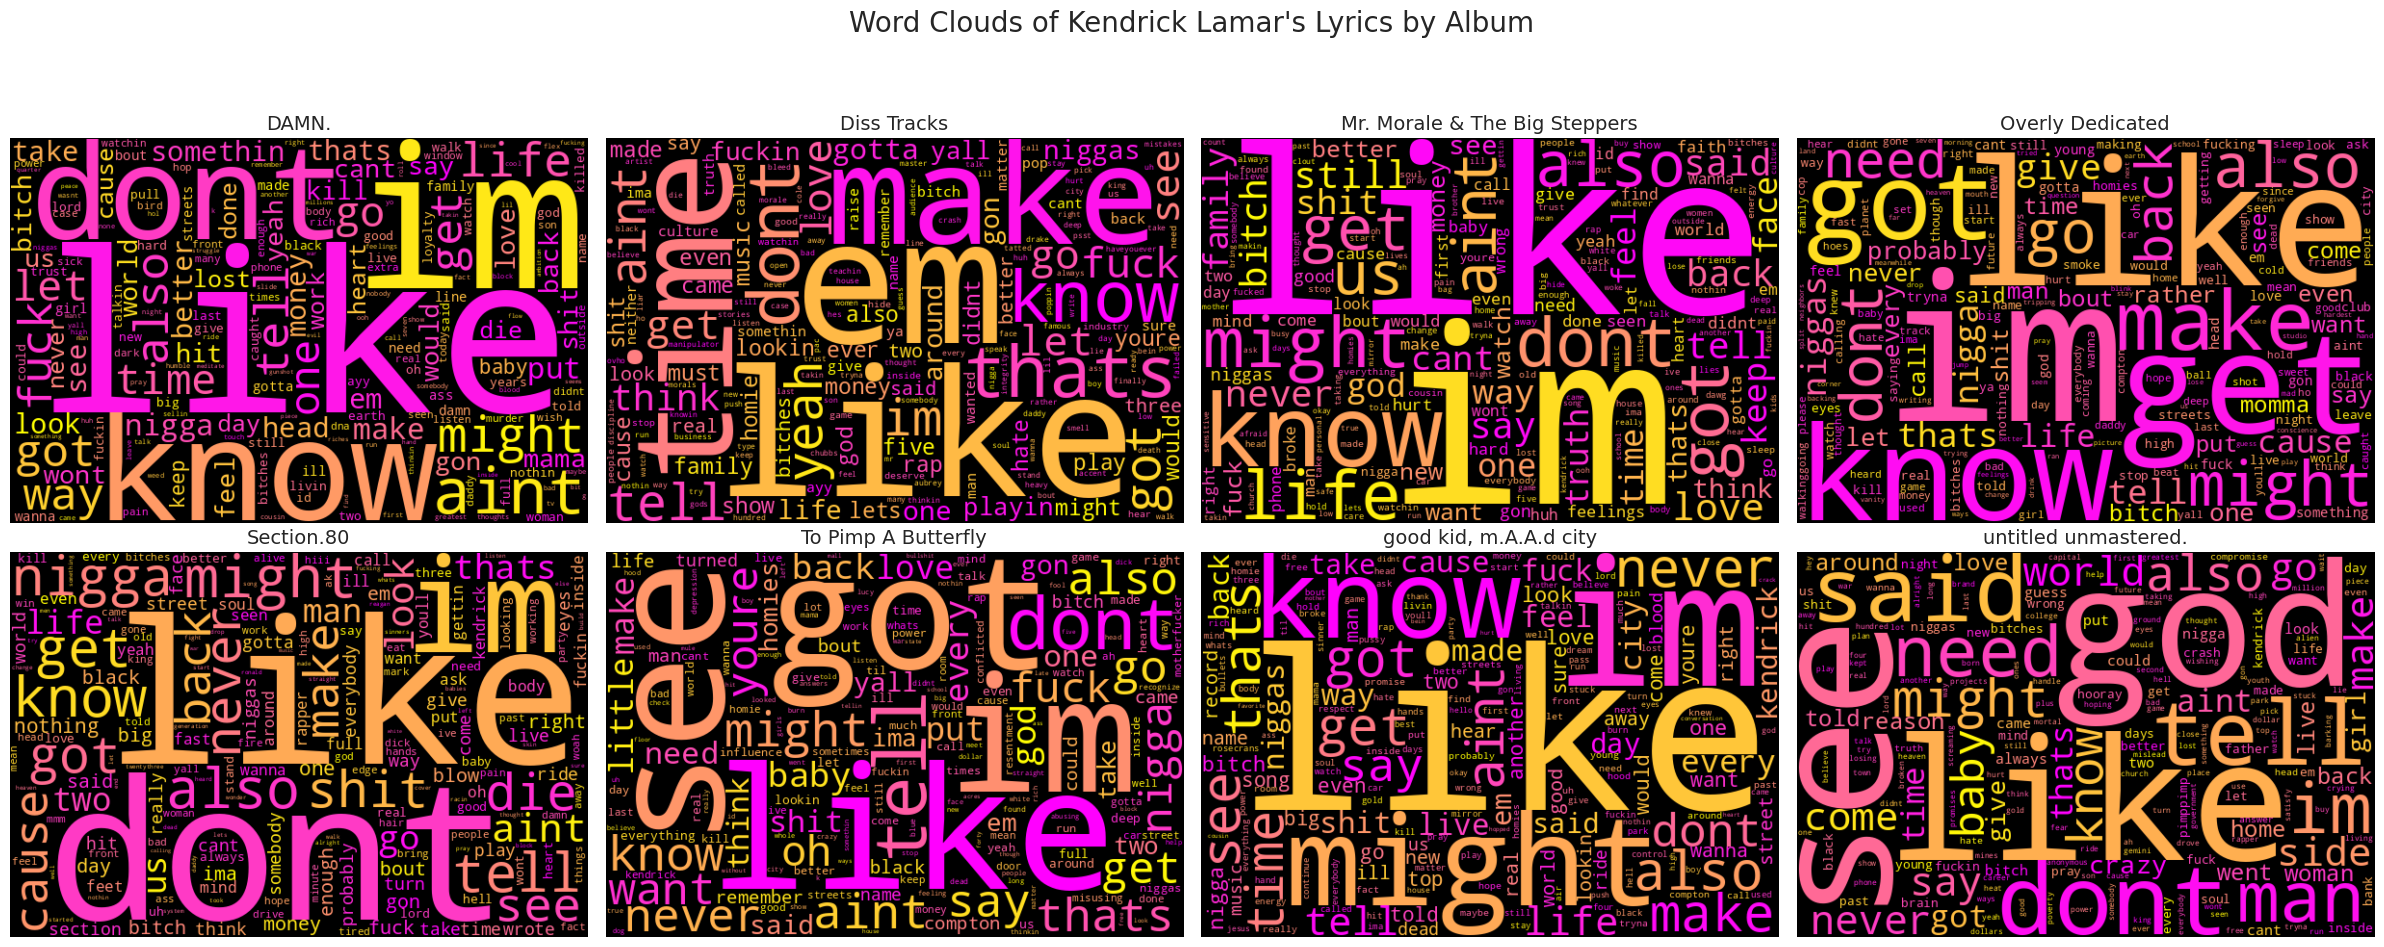

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))
axs = axs.flatten()

for idx, (album, freqs) in enumerate(album_word_freqs.items()):
    wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='spring')\
        .generate_from_frequencies(freqs)
    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].set_title(album, fontsize=14)
    axs[idx].axis('off')

plt.suptitle("Word Clouds of Kendrick Lamar's Lyrics by Album", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Top 10 most used words**

<ipython-input-51-b9fa1ff79eb4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="viridis")
<ipython-input-51-b9fa1ff79eb4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="viridis")
<ipython-input-51-b9fa1ff79eb4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="viridis")
<ipython-input-51-b9fa1ff79eb4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

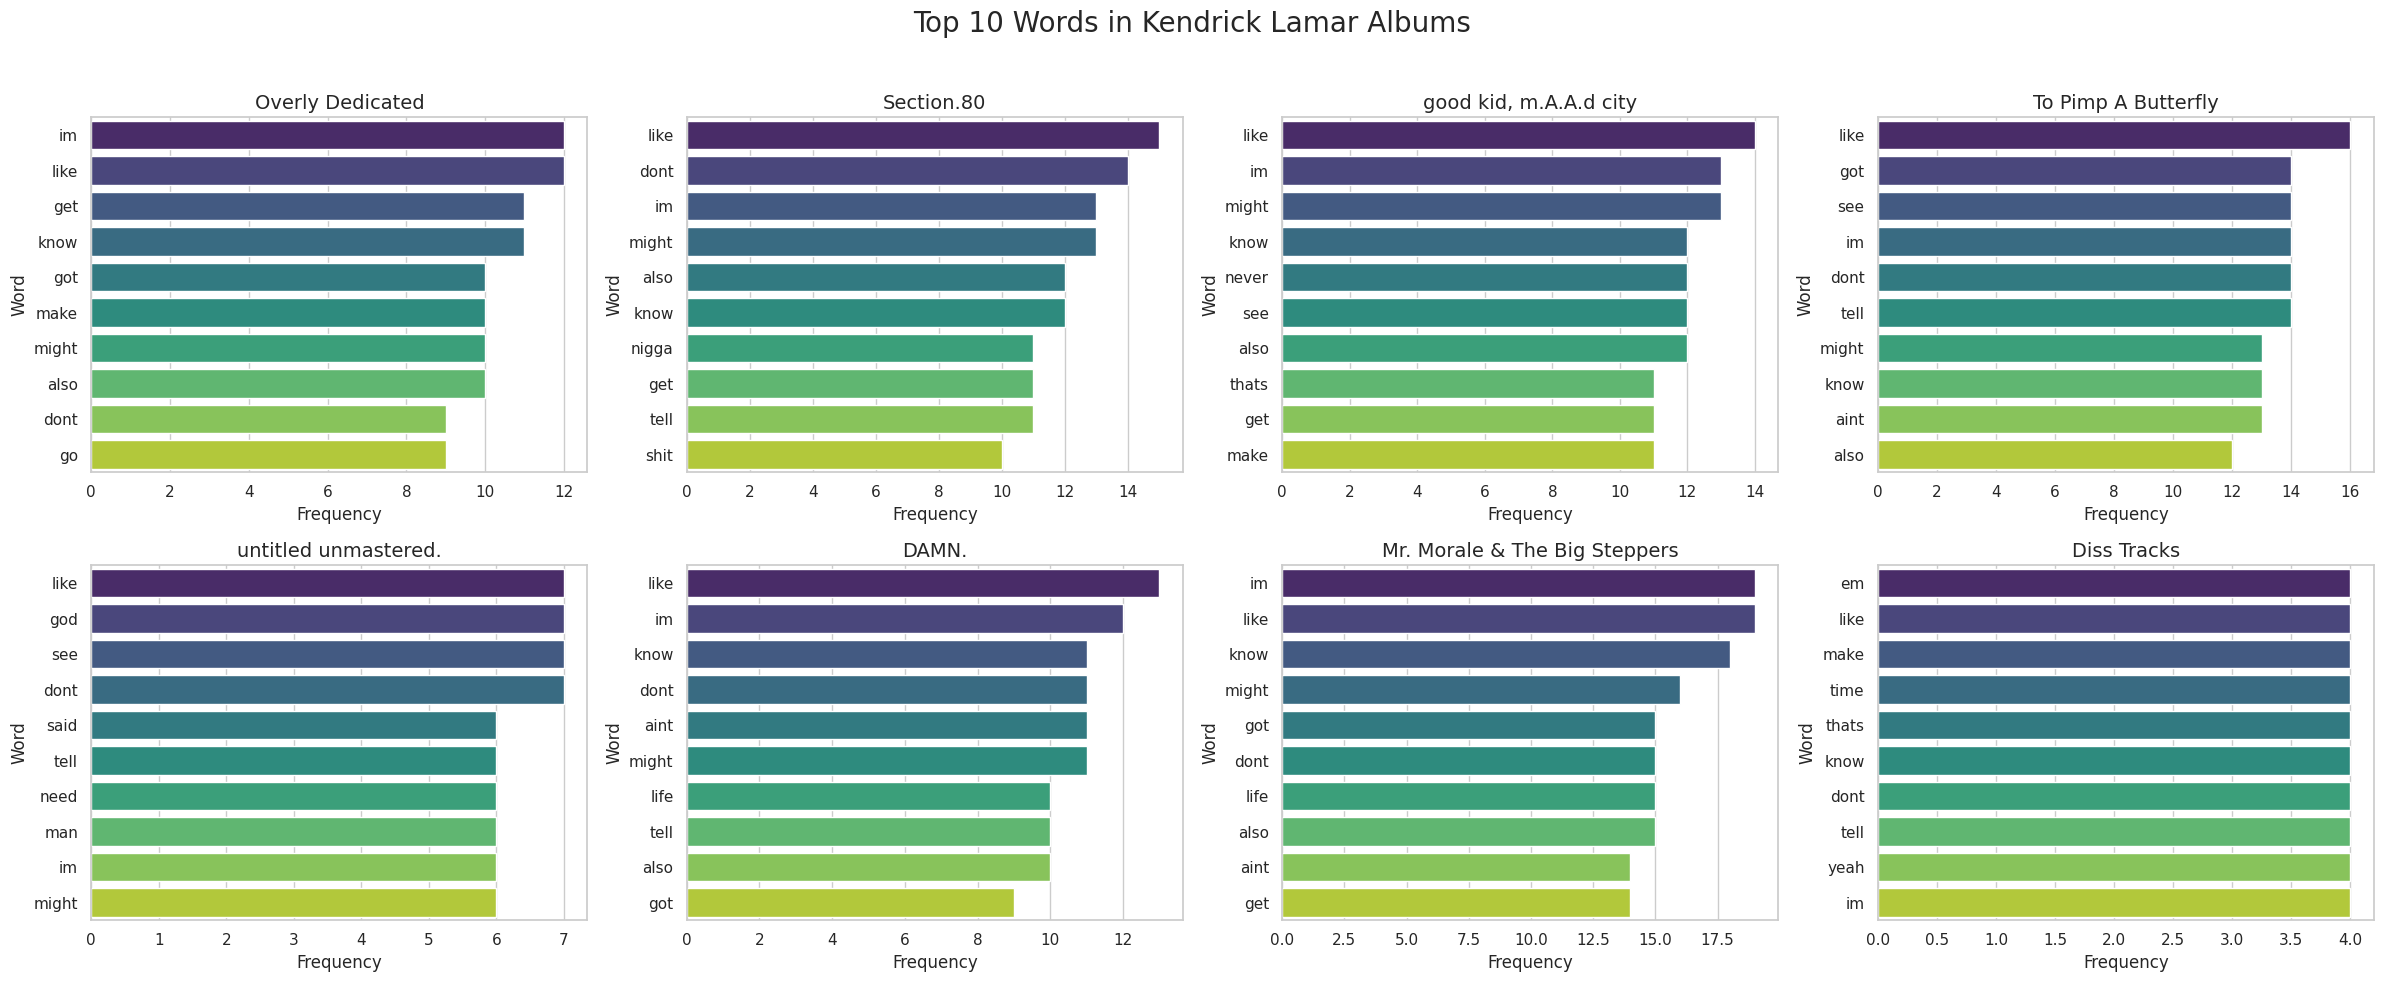

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

albums = df['album'].unique()
num_albums = len(albums)
cols = 4
rows = -(-num_albums // cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for idx, album in enumerate(albums):
    lyrics = df[df['album'] == album]['clean_dedup_lyrics'].str.cat(sep=' ')
    word_freq = Counter(lyrics.split())
    top_words = word_freq.most_common(10)
    words, counts = zip(*top_words)

    sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="viridis")
    axes[idx].set_title(f"{album}", fontsize=14)
    axes[idx].set_xlabel("Frequency")
    axes[idx].set_ylabel("Word")

for i in range(len(albums), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Top 10 Words in Kendrick Lamar Albums", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Top 10 least used words**

<ipython-input-52-911fc0f269a3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="magma")
<ipython-input-52-911fc0f269a3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="magma")
<ipython-input-52-911fc0f269a3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="magma")
<ipython-input-52-911fc0f269a3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

<function matplotlib.pyplot.show(close=None, block=None)>

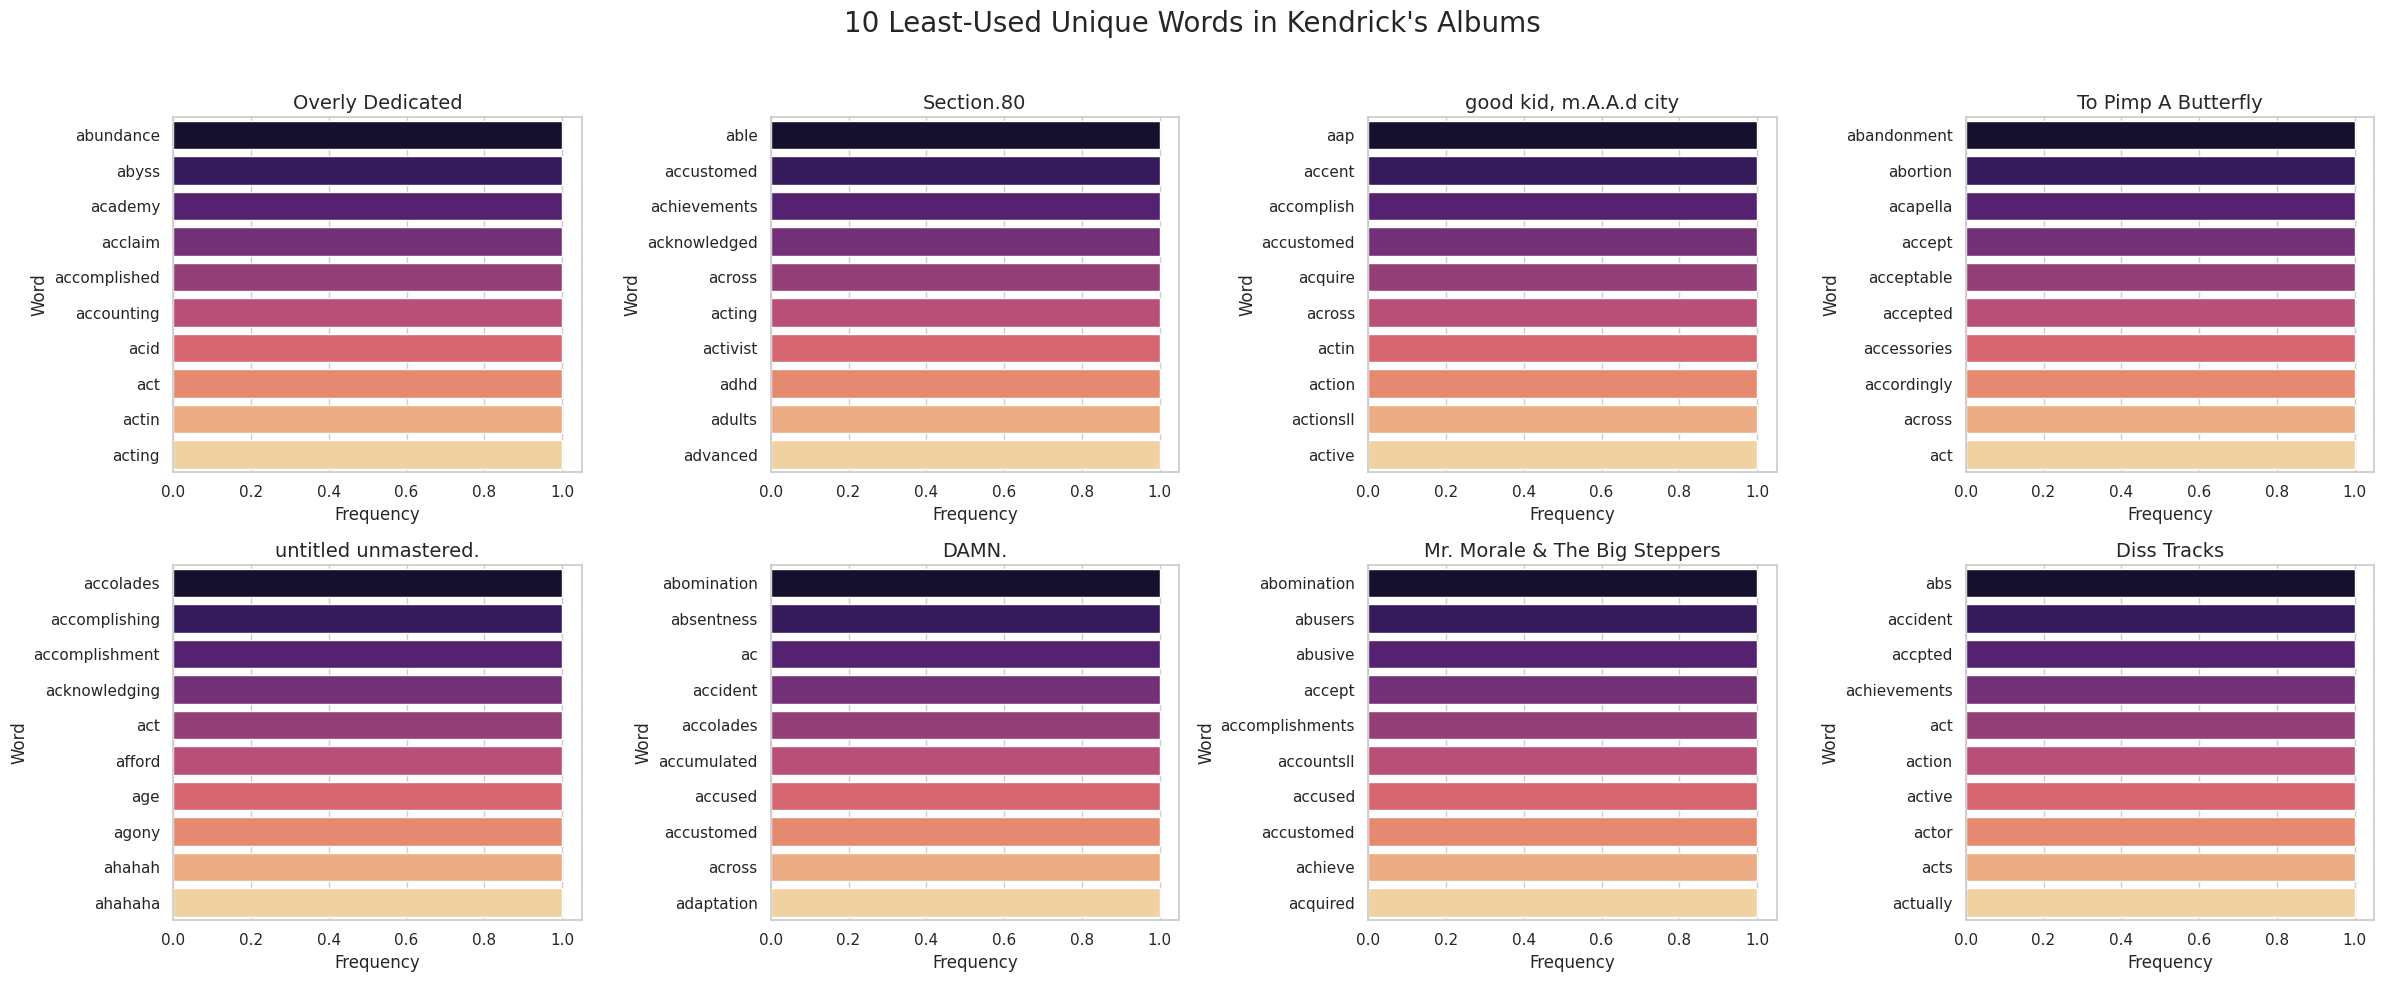

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

albums = df['album'].unique()
num_albums = len(albums)
cols = 4
rows = -(-num_albums // cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for idx, album in enumerate(albums):
    lyrics = df[df['album'] == album]['clean_dedup_lyrics'].str.cat(sep=' ')
    word_freq = Counter(lyrics.split())

    least_common_words = [item for item in word_freq.items() if item[1] == 1]
    least_common_words = sorted(least_common_words, key=lambda x: x[0])[:10]

    if least_common_words:
        words, counts = zip(*least_common_words)
        sns.barplot(x=list(counts), y=list(words), ax=axes[idx], palette="magma")
        axes[idx].set_title(f"{album}", fontsize=14)
        axes[idx].set_xlabel("Frequency")
        axes[idx].set_ylabel("Word")
    else:
        axes[idx].text(0.5, 0.5, 'No Unique Words', horizontalalignment='center', verticalalignment='center')
        axes[idx].set_title(f"{album}")
        axes[idx].axis('off')

for i in range(len(albums), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("10 Least-Used Unique Words in Kendrick's Albums", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show


# **Sentiment Analysis**

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['vader_compound'] = df['clean_dedup_lyrics'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['vader_pos'] = df['clean_dedup_lyrics'].apply(lambda x: sia.polarity_scores(x)['pos'])
df['vader_neu'] = df['clean_dedup_lyrics'].apply(lambda x: sia.polarity_scores(x)['neu'])
df['vader_neg'] = df['clean_dedup_lyrics'].apply(lambda x: sia.polarity_scores(x)['neg'])

print(df[['track_name', 'album', 'vader_compound', 'vader_pos', 'vader_neu', 'vader_neg']].head())

           track_name             album  vader_compound  vader_pos  vader_neu  \
0       Growing Apart  Overly Dedicated         -0.9605      0.164      0.590   
1  Ignorance Is Bliss  Overly Dedicated         -0.9855      0.164      0.569   
2             P&P 1.5  Overly Dedicated         -0.9524      0.200      0.533   
3          Alien Girl  Overly Dedicated          0.9322      0.236      0.614   
4   Opposites Attract  Overly Dedicated         -0.6793      0.192      0.600   

   vader_neg  
0      0.246  
1      0.267  
2      0.267  
3      0.151  
4      0.208  


# **Sentiment Analysis Visualization Suite**

<ipython-input-61-9934b2f194e8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='album', y='vader_compound', data=df, palette="coolwarm")
<ipython-input-61-9934b2f194e8>:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


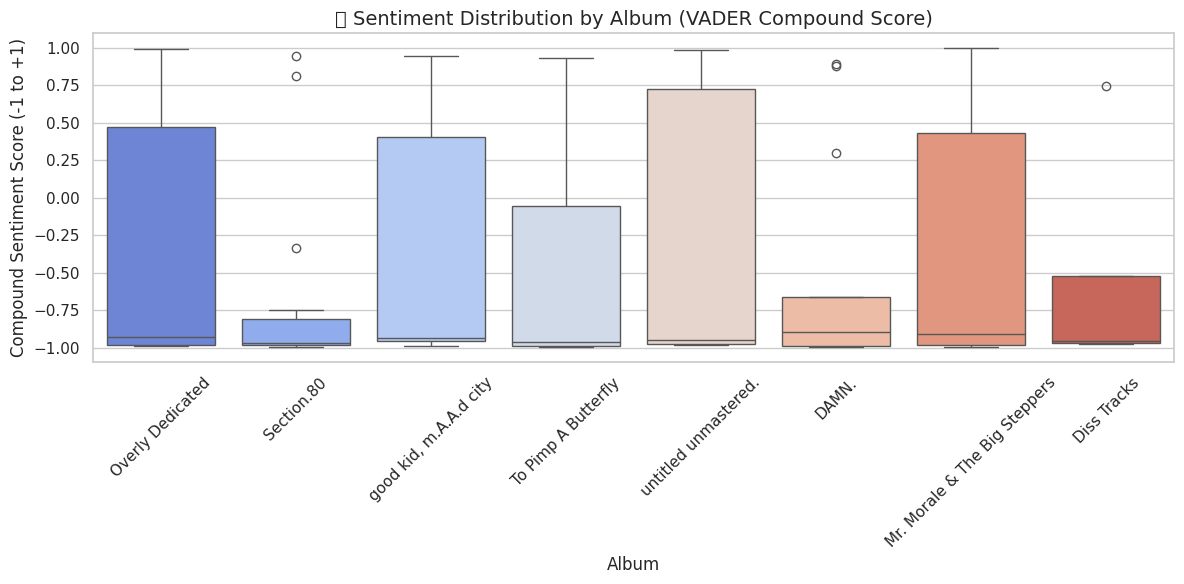

<ipython-input-61-9934b2f194e8>:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


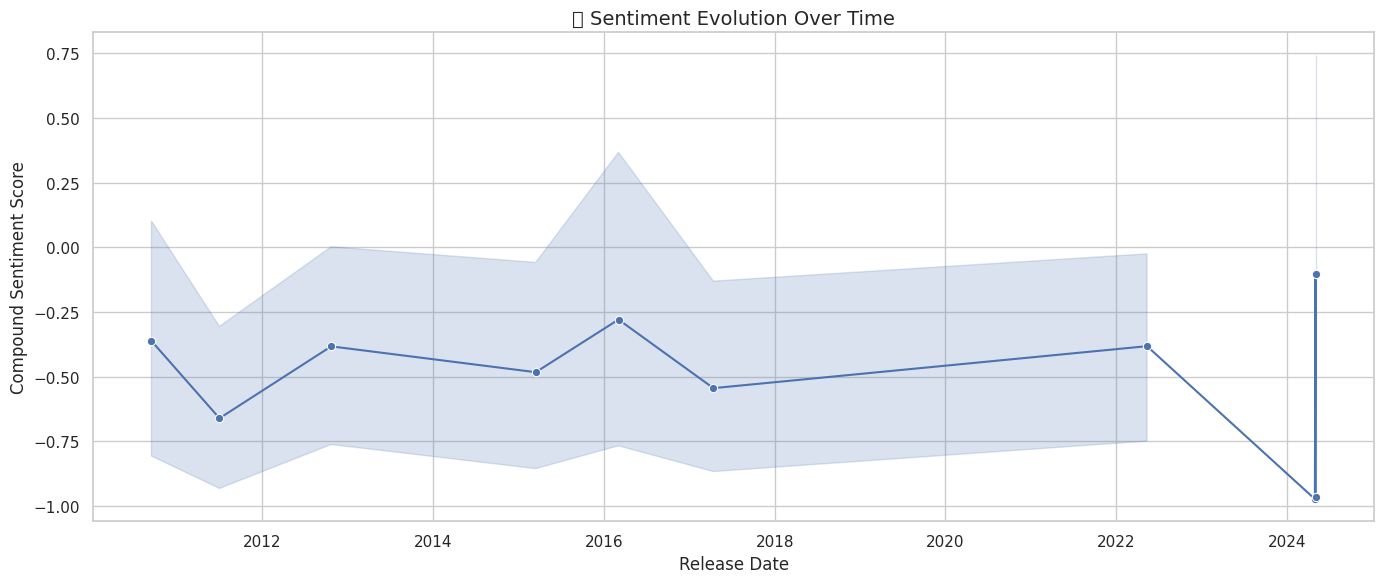

<ipython-input-61-9934b2f194e8>:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


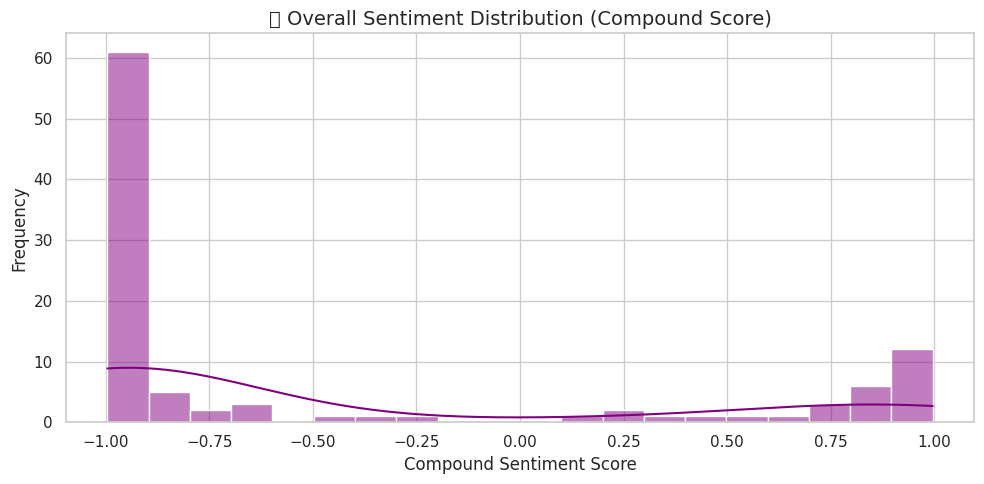

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df['release_date'] = pd.to_datetime(df['release_date'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='album', y='vader_compound', data=df, palette="coolwarm")
plt.title(" Sentiment Distribution by Album (VADER Compound Score)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Compound Sentiment Score (-1 to +1)")
plt.xlabel("Album")
plt.tight_layout()
plt.show()

df_sorted = df.sort_values(by='release_date')
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_date', y='vader_compound', data=df_sorted, marker='o')
plt.title(" Sentiment Evolution Over Time", fontsize=14)
plt.ylabel("Compound Sentiment Score")
plt.xlabel("Release Date")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df['vader_compound'], bins=20, kde=True, color='purple')
plt.title(" Overall Sentiment Distribution (Compound Score)", fontsize=14)
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# **Top 5 most positive and negative songs**

🎵 Top 5 Most Positive Songs:
                   track_name                          album  vader_compound
93             Auntie Diaries  Mr. Morale & The Big Steppers          0.9963
11               She Needs Me               Overly Dedicated          0.9910
63  untitled 06 | 06.30.2014.           untitled unmastered.          0.9876
85                Rich Spirit  Mr. Morale & The Big Steppers          0.9781
96                     Mirror  Mr. Morale & The Big Steppers          0.9740

🎵 Top 5 Most Negative Songs:
            track_name                          album  vader_compound
51       Hood Politics            To Pimp A Butterfly         -0.9959
22          Rigamortus                     Section.80         -0.9957
95      Mother I Sober  Mr. Morale & The Big Steppers         -0.9957
81  Worldwide Steppers  Mr. Morale & The Big Steppers         -0.9941
76               FEAR.                          DAMN.         -0.9938


<ipython-input-60-183878ebf6ef>:26: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


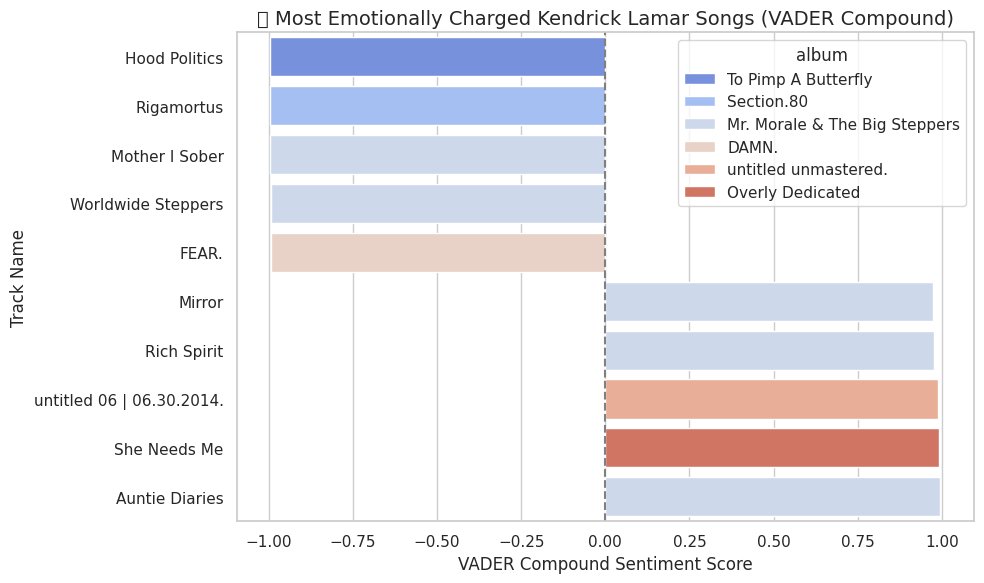

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

most_positive = df.sort_values(by='vader_compound', ascending=False).head(5)
most_negative = df.sort_values(by='vader_compound', ascending=True).head(5)

top_emotional = pd.concat([most_positive, most_negative])
top_emotional = top_emotional.sort_values(by='vader_compound')

print(" Top 5 Most Positive Songs:")
print(most_positive[['track_name', 'album', 'vader_compound']])

print("\n Top 5 Most Negative Songs:")
print(most_negative[['track_name', 'album', 'vader_compound']])

plt.figure(figsize=(10, 6))
sns.barplot(x='vader_compound', y='track_name', data=top_emotional, hue='album', dodge=False, palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title(" Most Emotionally Charged Kendrick Lamar Songs (VADER Compound)", fontsize=14)
plt.xlabel("VADER Compound Sentiment Score")
plt.ylabel("Track Name")
plt.tight_layout()
plt.show()


# **Sentiment Distribution by Album with Song Points**

<ipython-input-63-446091cc00bd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='album', y='vader_compound', data=df, palette="coolwarm", boxprops=dict(alpha=0.6))


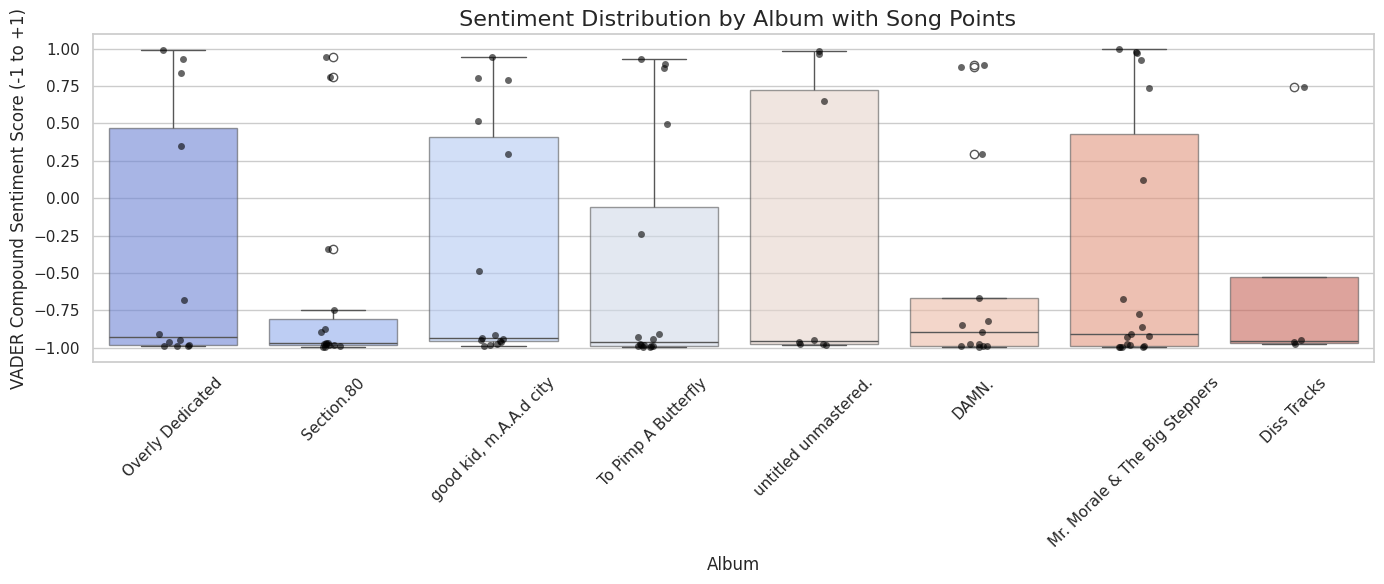

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

sns.boxplot(x='album', y='vader_compound', data=df, palette="coolwarm", boxprops=dict(alpha=0.6))

sns.stripplot(x='album', y='vader_compound', data=df, color='black', alpha=0.6, jitter=True, size=5)

plt.title(" Sentiment Distribution by Album with Song Points", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("VADER Compound Sentiment Score (-1 to +1)")
plt.xlabel("Album")
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("kendrick_sentiment_enriched.csv", index=False)